In [17]:
import tensorflow as tf

## Load the mnist dataset


In [18]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Shapes
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


## Preprocess the data


In [19]:
#Normalizing input data to [0,1] range
x_train = x_train / 255.0
x_test = x_test / 255.0

#flatten 28x28 to 1 dimensional 784-element vector
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

##Check Counts

In [20]:
import numpy as np

# Count unique values and their counts in y_train
unique_values, counts = np.unique(y_train, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")
print(len(y_train))

Value: 0, Count: 5923
Value: 1, Count: 6742
Value: 2, Count: 5958
Value: 3, Count: 6131
Value: 4, Count: 5842
Value: 5, Count: 5421
Value: 6, Count: 5918
Value: 7, Count: 6265
Value: 8, Count: 5851
Value: 9, Count: 5949
60000


##Over Sampling

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

# Count unique values and their counts in y_train_resampled
unique_values_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)

# Print the unique values and their counts after oversampling
for value, count in zip(unique_values_resampled, counts_resampled):
    print(f"Value: {value}, Count: {count}")

print(len(y_train_resampled))

Value: 0, Count: 6742
Value: 1, Count: 6742
Value: 2, Count: 6742
Value: 3, Count: 6742
Value: 4, Count: 6742
Value: 5, Count: 6742
Value: 6, Count: 6742
Value: 7, Count: 6742
Value: 8, Count: 6742
Value: 9, Count: 6742
67420


## Build the model


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU, Input

model = Sequential([
    Input(shape=(784,)),
    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

## Compile the model


In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

## Train the model


In [24]:
history = model.fit(x_train_resampled, y_train_resampled, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8181 - loss: 0.6234 - val_accuracy: 0.9570 - val_loss: 0.1417
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9577 - loss: 0.1452 - val_accuracy: 0.9794 - val_loss: 0.0727
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9701 - loss: 0.1026 - val_accuracy: 0.9782 - val_loss: 0.0694
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9681 - loss: 0.1033 - val_accuracy: 0.9886 - val_loss: 0.0386
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9816 - loss: 0.0618 - val_accuracy: 0.9895 - val_loss: 0.0357
Epoch 6/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9844 - loss: 0.0485 - val_accuracy: 0.9941 - val_loss: 0.0245
Epoch 7/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9850 - loss: 0.0486 - val_accuracy: 0.9910 - val_loss: 0.0288
Epoch 8/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9834 - loss: 0.0523 - val_accuracy: 0

## Visualize training history

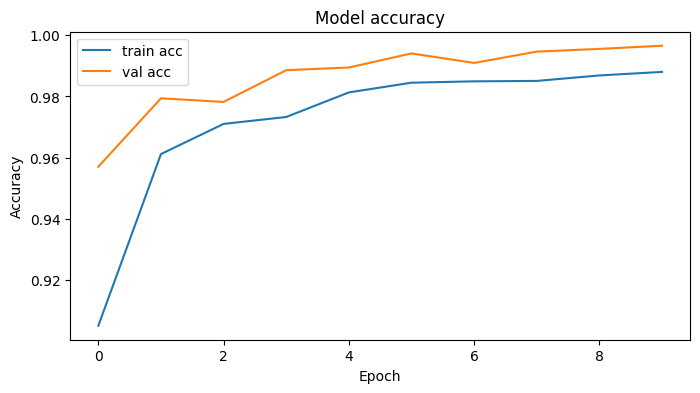

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


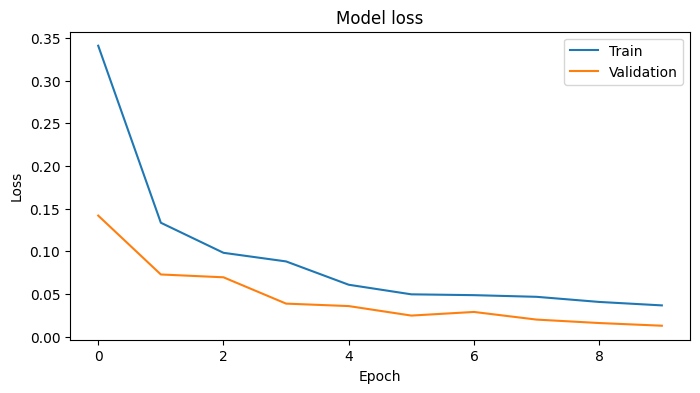

In [26]:
# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='train acc')
plt.plot(history.history['val_loss'], label='val acc')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

## Evaluate the model

In [27]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0824
Test accuracy: 97.92%


In [28]:
model.save("mnist_model.h5")